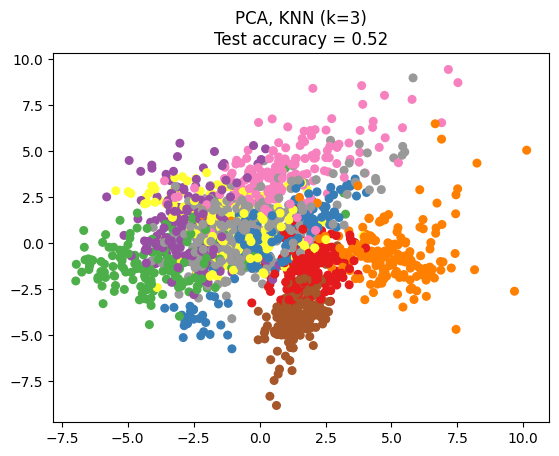

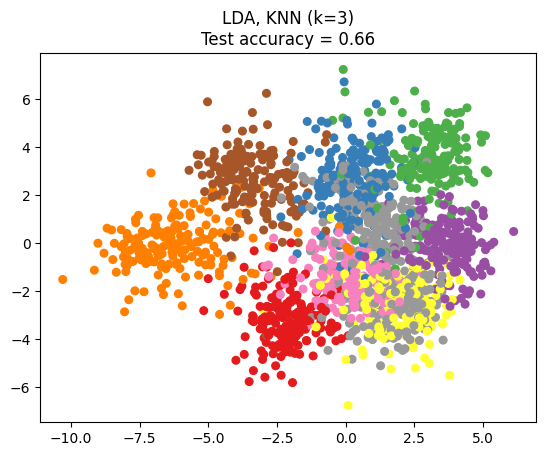

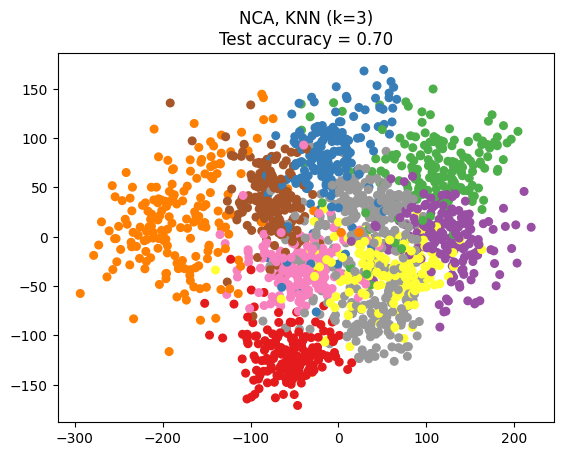

In [1]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3  # KNN 분류기에서 사용할 이웃의 수
random_state = 0  # 난수 생성기 시드 값

# Digits 데이터셋 로드
X, y = datasets.load_digits(return_X_y=True)

# 훈련/테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X[0])  # 입력 차원
n_classes = len(np.unique(y))  # 클래스의 개수

# PCA를 사용하여 차원을 2로 축소하는 파이프라인 생성
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# LDA를 사용하여 차원을 2로 축소하는 파이프라인 생성
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# NCA를 사용하여 차원을 2로 축소하는 파이프라인 생성
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# KNN 분류기 생성
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# 비교할 차원 축소 방법 목록 생성
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# 각 차원 축소 방법에 대해 반복
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # 차원 축소 모델 훈련
    model.fit(X_train, y_train)

    # 임베딩된 훈련 세트에 KNN 분류기 훈련
    knn.fit(model.transform(X_train), y_train)

    # 임베딩된 테스트 세트에서 KNN 분류 정확도 계산
    acc_knn = knn.score(model.transform(X_test), y_test)

    # 모델을 사용하여 데이터셋을 2차원으로 임베딩
    X_embedded = model.transform(X)

    # 임베딩된 점들을 플로팅하고 평가 점수를 표시
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()